# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [6]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 328 kB 7.2 MB/s 
     |████████████████████████████████| 102 kB 69.8 MB/s 
     |████████████████████████████████| 679 kB 52.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 46.8 MB/s 
     |████████████████████████████████| 4.7 MB 34.0 MB/s 
     |████████████████████████████████| 296 kB 60.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1c78c59a582bd95c224bfdb3f09481d0e0bc52b1a9a33e3fe0801535323da541
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

In [7]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 6.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [8]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "cavaliereoscuro"
kaggle_key = "f53b025d967f6ebb6be8217a5be61091"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [10]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 64.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config

In [12]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train = train.drop(columns=['casual', 'registered'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [13]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [14]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [40]:
predictor = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train,
    time_limit=600,
    presets=['best_quality'])

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_141325/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_141325/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11220.25 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [ ]:
!tar -czvf Autogluon_models_INITIAL.tar.gz /content/AutogluonModels/ag-20221226_102844   

tar: Removing leading `/' from member names
/content/AutogluonModels/ag-20221226_102844/
/content/AutogluonModels/ag-20221226_102844/__version__
/content/AutogluonModels/ag-20221226_102844/predictor.pkl
/content/AutogluonModels/ag-20221226_102844/learner.pkl
/content/AutogluonModels/ag-20221226_102844/models/
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/S1F1/
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/S1F1/model.pkl
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/model.pkl
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/utils/
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/utils/model_template.pkl
/content/AutogluonModels/ag-20221226_102844/models/KNeighborsUnif_BAG_L1/utils/oof.pkl
/content/AutogluonModels/ag-20221226_102844/models/NeuralNetFastAI_BAG_L1/
/content/AutogluonModels/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/Autogluon_models_INITIAL.tar.gz /content/drive/MyDrive/Udacity_course/Bike_Sharing_project

### Review AutoGluon's training run with ranking of models that did the best.

In [41]:
y_pred = predictor.predict(train.drop(columns=['count']))
predictor.evaluate_predictions(y_true=train['count'], y_pred=y_pred)

Evaluation: root_mean_squared_error on test data: -76.53079101584122
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -76.53079101584122,
    "mean_squared_error": -5856.961973510362,
    "mean_absolute_error": -51.94258523104128,
    "r2": 0.8214901365629536,
    "pearsonr": 0.940169069039127,
    "median_absolute_error": -30.155585289001465
}


{'root_mean_squared_error': -76.53079101584122,
 'mean_squared_error': -5856.961973510362,
 'mean_absolute_error': -51.94258523104128,
 'r2': 0.8214901365629536,
 'pearsonr': 0.940169069039127,
 'median_absolute_error': -30.155585289001465}

Initial root mean square ERROR is: 70.64474740532708

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.670633       8.918191  443.085603                0.000791           0.425052            3       True         16
1   RandomForestMSE_BAG_L2  -53.348002       8.143740  405.404601                0.931981          26.706316            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.558391       7.834612  386.798636                0.622853           8.100352            2       True         14
3          LightGBM_BAG_L2  -54.872189       7.362567  407.853883                0.150808          29.155599            2       True         11
4        LightGBMXT_BAG_L2  -60.529007       9.442262  436.866884                2.230503          58.168600            2       True         10
5          CatBoost_BAG_L2  -62.381941       7.249979  425.862078         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_

### Create predictions from test dataset

In [42]:
predictions = predictor.predict(test)
predictions.head()

0    23.367407
1    41.613731
2    44.855293
3    48.292545
4    50.733295
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.603920
std        90.128250
min         3.047305
25%        20.911312
50%        62.452000
75%       169.003357
max       363.079956
Name: count, dtype: float64

In [43]:
# How many negative values do we have?
predictions[predictions < 0].count()

0

In [44]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [45]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:03<00:00, 57.0kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission.csv               2022-12-26 08:12:45  first raw submission                  complete  1.80551      1.80551       
submission_new_hpo.csv       2022-12-25 20:53:25  new features with hyperparameters     complete  0.52291      0.52291       
submission_new_hpo.csv       2022-12-25 20:50:08  new features with hyperparameters     complete  0.52791      0.52791       
submission_new_hpo.csv       2022-12-25 20:41:30  new features with hyperparameters     complete  0.48249      0.48249       


#### Initial score of 1.80551

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
# ADDED CELL: perform profiling with pandas-profile
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="Report of train dataset")
profile.to_file("Report_001.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f431e6238b0>,
      dtype=object)

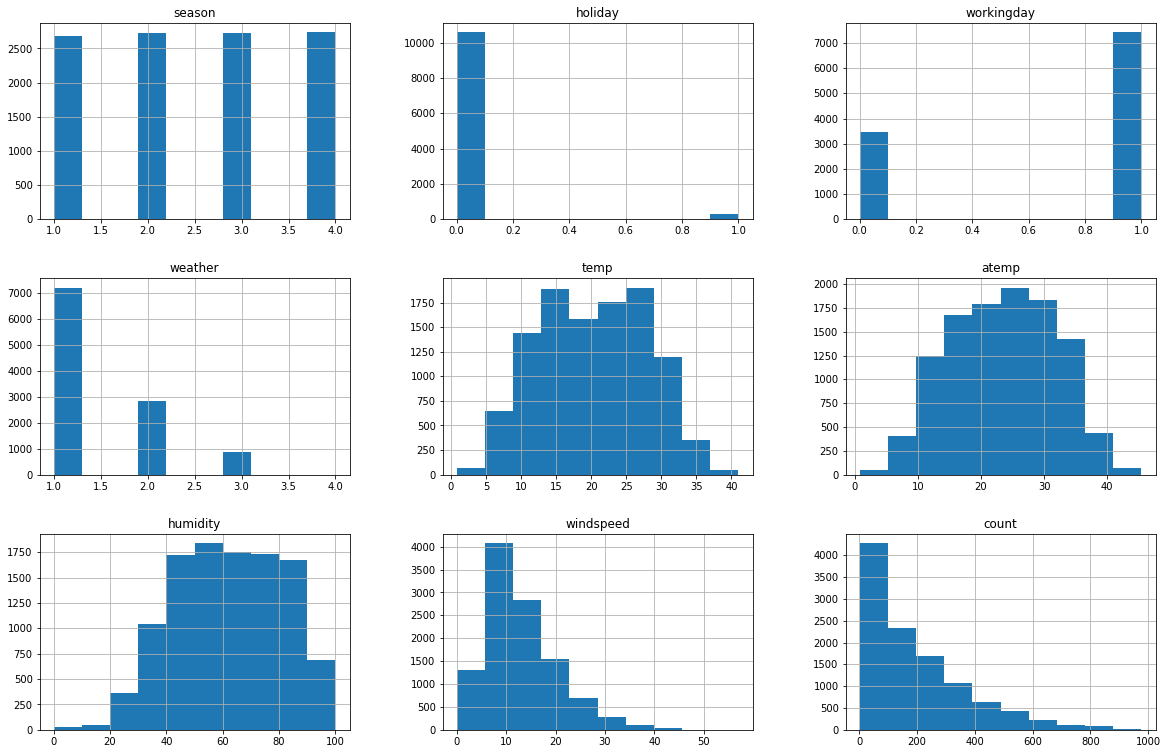

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,13))

In [16]:
train_features = train.copy()
test_features = test.copy()

In [17]:
# create a new feature: datetime
train_features.loc[:,'datetime'] = pd.to_datetime(train_features['datetime'])
test_features.loc[:,'datetime'] = pd.to_datetime(test_features['datetime'])

# Add single datetiem features for TRAIN
train_features['year']        = train_features['datetime'].dt.year
train_features['month']       = train_features['datetime'].dt.month
train_features['day']         = train_features['datetime'].dt.day
train_features['hour']        = train_features['datetime'].dt.hour
train_features['dayofweek']   = train_features['datetime'].dt.dayofweek
# train['minute'] = train['datetime'].dt.minute
# train['second'] = train['datetime'].dt.second

# Add single datetiem features for TEST
test_features['year']         = test_features['datetime'].dt.year
test_features['month']        = test_features['datetime'].dt.month
test_features['day']          = test_features['datetime'].dt.day
test_features['hour']         = test_features['datetime'].dt.hour
test_features['dayofweek']    = test_features['datetime'].dt.dayofweek
# test['minute']  = test['datetime'].dt.minute
# test['second']  = test['datetime'].dt.second

In [18]:
train_features = train_features.drop(columns=['datetime'])

## Normalize features: temp, atemp, humidity and windspeed

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
feat_to_norm = ['temp', 'atemp', 'humidity', 'windspeed']
scaler = StandardScaler().fit( train_features.loc[:, feat_to_norm] )

In [21]:
train_features.loc[:, feat_to_norm] = scaler.transform(train_features.loc[:, feat_to_norm])

In [22]:
test_features.loc[:, feat_to_norm] = scaler.transform(test_features.loc[:, feat_to_norm])

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train_features.loc[:,'season'] = train_features['season'].astype('category')
train_features.loc[:,'weather'] = train_features['weather'].astype('category')
test_features.loc[:,'season'] = test_features['season'].astype('category')
test_features.loc[:,'weather'] = test_features['weather'].astype('category')

In [ ]:
# View are new feature
train_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,16,2011,1,1,0,5
1,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,40,2011,1,1,1,5
2,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,32,2011,1,1,2,5
3,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,13,2011,1,1,3,5
4,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1,2011,1,1,4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f433d746880>,
      dtype=object)

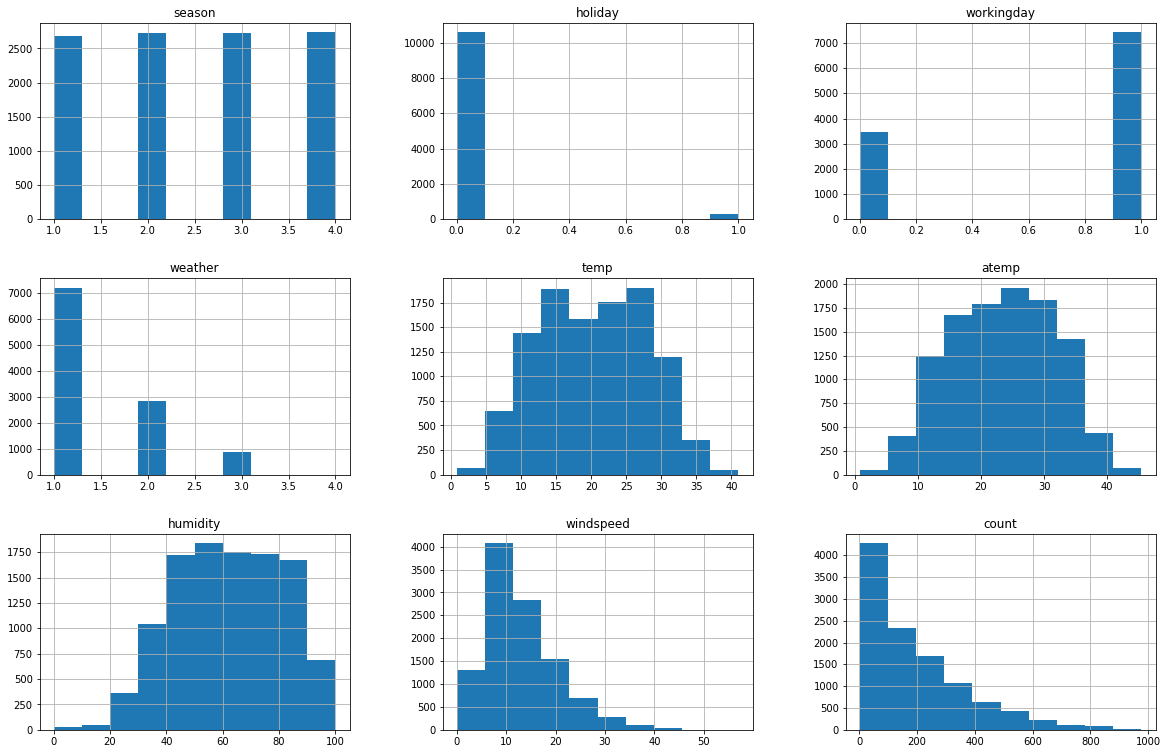

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,13))

## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
predictor_new_features = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train_features, 
    time_limit=600, 
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_143429/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_143429/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11332.58 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

In [ ]:
!tar -czvf Autogluon_models_ADD_FEATURES.tar.gz /content/AutogluonModels/ag-20221226_105343

tar: Removing leading `/' from member names
/content/AutogluonModels/ag-20221226_105343/
/content/AutogluonModels/ag-20221226_105343/__version__
/content/AutogluonModels/ag-20221226_105343/predictor.pkl
/content/AutogluonModels/ag-20221226_105343/learner.pkl
/content/AutogluonModels/ag-20221226_105343/models/
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/S1F1/
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/S1F1/model.pkl
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/model.pkl
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/utils/
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/utils/model_template.pkl
/content/AutogluonModels/ag-20221226_105343/models/KNeighborsUnif_BAG_L1/utils/oof.pkl
/content/AutogluonModels/ag-20221226_105343/models/NeuralNetFastAI_BAG_L1/
/content/AutogluonModels/

In [ ]:
!cp -r /content/Autogluon_models_ADD_FEATURES.tar.gz /content/drive/MyDrive/Udacity_course/Bike_Sharing_project

In [47]:
y_pred_new_features = predictor_new_features.predict(train_features.drop(columns=['count']))
predictor_new_features.evaluate_predictions(y_true=train_features['count'], y_pred=y_pred_new_features)

Evaluation: root_mean_squared_error on test data: -14.573210847073893
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -14.573210847073893,
    "mean_squared_error": -212.3784743932722,
    "mean_absolute_error": -9.300771764308987,
    "r2": 0.9935270789476905,
    "pearsonr": 0.9967876128021069,
    "median_absolute_error": -5.608089447021484
}


{'root_mean_squared_error': -14.573210847073893,
 'mean_squared_error': -212.3784743932722,
 'mean_absolute_error': -9.300771764308987,
 'r2': 0.9935270789476905,
 'pearsonr': 0.9967876128021069,
 'median_absolute_error': -5.608089447021484}

After adding new features root mean square ERROR is: 14.412714802727148

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -31.804903      18.221749  559.824348                0.001225           0.373859            3       True         16
1          LightGBM_BAG_L2  -32.088099      16.339767  419.759960                0.156505          21.447337            2       True         11
2     ExtraTreesMSE_BAG_L2  -32.213274      16.822475  406.268361                0.639213           7.955738            2       True         14
3          CatBoost_BAG_L2  -32.238120      16.294287  478.377309                0.111025          80.064686            2       True         13
4   RandomForestMSE_BAG_L2  -32.623708      16.829134  424.871936                0.645873          26.559313            2       True         12
5      WeightedEnsemble_L2  -32.632140      15.715723  361.575253         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -73.32941502631913,
  'KNeighborsDist_BAG_L1': -68.51315919694413,

In [48]:
predictions_new_features = predictor_new_features.predict(
    test_features)

In [ ]:
predictions_new_features.describe()

count    6493.000000
mean      190.222412
std       173.409103
min         3.089768
25%        47.533154
50%       149.266785
75%       279.044647
max       898.920410
Name: count, dtype: float64

In [49]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [50]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv')

In [51]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [52]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 89.5kB/s]
Successfully submitted to Bike Sharing Demand

In [53]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-12-26 14:48:43  new features                               complete  0.45745      0.45745       
submission_new_hpo_5.csv     2022-12-26 14:08:12  new features with hyperparameters - hpo 5  complete  0.54929      0.54929       
submission_new_hpo_4.csv     2022-12-26 13:41:29  new features with hyperparameters - hpo 4  complete  0.55408      0.55408       
submission_new_hpo_3.csv     2022-12-26 13:27:54  new features with hyperparameters - hpo 3  complete  0.46413      0.46413       


#### New Score of 0.46039

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [24]:
# Now we can add the custom model with tuned hyperparameters to be trained alongside the default models:
custom_hyperparameters = get_hyperparameter_config('default')
custom_hyperparameters

{'NN_TORCH': {},
 'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}},
  {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}]}

### Adding a custom model to AutoGluon

In [ ]:
import numpy as np
import pandas as pd

from autogluon.core.models import AbstractModel
from autogluon.features.generators import LabelEncoderFeatureGenerator

class CustomRandomForestModel(AbstractModel):
    def __init__(self, **kwargs):
        # Simply pass along kwargs to parent, and init our internal `_feature_generator` variable to None
        super().__init__(**kwargs)
        self._feature_generator = None

    # The `_preprocess` method takes the input data and transforms it to the internal representation usable by the model.
    # `_preprocess` is called by `preprocess` and is used during model fit and model inference.
    def _preprocess(self, X: pd.DataFrame, is_train=False, **kwargs) -> np.ndarray:
        print(f'Entering the `_preprocess` method: {len(X)} rows of data (is_train={is_train})')
        X = super()._preprocess(X, **kwargs)

        if is_train:
            # X will be the training data.
            self._feature_generator = LabelEncoderFeatureGenerator(verbosity=0)
            self._feature_generator.fit(X=X)
        if self._feature_generator.features_in:
            # This converts categorical features to numeric via stateful label encoding.
            X = X.copy()
            X[self._feature_generator.features_in] = self._feature_generator.transform(X=X)
        # Add a fillna call to handle missing values.
        # Some algorithms will be able to handle NaN values internally (LightGBM).
        # In those cases, you can simply pass the NaN values into the inner model.
        # Finally, convert to numpy for optimized memory usage and because sklearn RF works with raw numpy input.
        return X.fillna(0).to_numpy(dtype=np.float32)

    # The `_fit` method takes the input training data (and optionally the validation data) and trains the model.
    def _fit(self,
             X: pd.DataFrame,  # training data
             y: pd.Series,  # training labels
             # X_val=None,  # val data (unused in RF model)
             # y_val=None,  # val labels (unused in RF model)
             # time_limit=None,  # time limit in seconds (ignored in tutorial)
             **kwargs):  # kwargs includes many other potential inputs, refer to AbstractModel documentation for details
        print('Entering the `_fit` method')

        # First we import the required dependencies for the model. Note that we do not import them outside of the method.
        # This enables AutoGluon to be highly extensible and modular.
        # For an example of best practices when importing model dependencies, refer to LGBModel.
        from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

        # Valid self.problem_type values include ['binary', 'multiclass', 'regression', 'quantile', 'softclass']
        if self.problem_type in ['regression', 'softclass']:
            model_cls = RandomForestRegressor
        else:
            model_cls = RandomForestClassifier

        # Make sure to call preprocess on X near the start of `_fit`.
        # This is necessary because the data is converted via preprocess during predict, and needs to be in the same format as during fit.
        X = self.preprocess(X, is_train=True)
        # This fetches the user-specified (and default) hyperparameters for the model.
        params = self._get_model_params()
        print(f'Hyperparameters: {params}')
        # self.model should be set to the trained inner model, so that internally during predict we can call `self.model.predict(...)`
        self.model = model_cls(**params)
        self.model.fit(X, y)
        print('Exiting the `_fit` method')

    # The `_set_default_params` method defines the default hyperparameters of the model.
    # User-specified parameters will override these values on a key-by-key basis.
    def _set_default_params(self):
        default_params = {
            'n_estimators': 300,
            'n_jobs': -1,
            'random_state': 0,
        }
        for param, val in default_params.items():
            self._set_default_param_value(param, val)

    # The `_get_default_auxiliary_params` method defines various model-agnostic parameters such as maximum memory usage and valid input column dtypes.
    # For most users who build custom models, they will only need to specify the valid/invalid dtypes to the model here.
    def _get_default_auxiliary_params(self) -> dict:
        default_auxiliary_params = super()._get_default_auxiliary_params()
        extra_auxiliary_params = dict(
            # the total set of raw dtypes are: ['int', 'float', 'category', 'object', 'datetime']
            # object feature dtypes include raw text and image paths, which should only be handled by specialized models
            # datetime raw dtypes are generally converted to int in upstream pre-processing,
            # so models generally shouldn't need to explicitly support datetime dtypes.
            valid_raw_types=['int', 'float', 'category'],
            # Other options include `valid_special_types`, `ignored_type_group_raw`, and `ignored_type_group_special`.
            # Refer to AbstractModel for more details on available options.
        )
        default_auxiliary_params.update(extra_auxiliary_params)
        return default_auxiliary_params

In [ ]:
# Separate features and labels
label = 'count'
X = train.drop(columns=[label])
y = train[label]
X_test = test

from autogluon.core.data import LabelCleaner
from autogluon.core.utils import infer_problem_type
# Construct a LabelCleaner to neatly convert labels to float/integers during model training/inference, can also use to inverse_transform back to original.
problem_type = infer_problem_type(y=y)  # Infer problem type (or else specify directly)
label_cleaner = LabelCleaner.construct(problem_type=problem_type, y=y)
y_clean = label_cleaner.transform(y)

print(f'Labels cleaned: {label_cleaner.inv_map}')
print(f'inferred problem type as: {problem_type}')
print('Cleaned label values:')
y_clean.head(5)

AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Labels cleaned: None
inferred problem type as: regression
Cleaned label values:


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
custom_model = CustomRandomForestModel()
# We could also specify hyperparameters to override defaults
# custom_model = CustomRandomForestModel(hyperparameters={'max_depth': 10})
custom_model.fit(X=X, y=y)  # Fit custom model

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_092747/CustomRandomForestModel/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model CustomRandomForestModel's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 10886 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method


In [ ]:
y_pred = custom_model.predict(X_test)
print(y_pred[:5])

Entering the `_preprocess` method: 6493 rows of data (is_train=False)
[14.036667   6.31       5.7033334  3.5533333  3.0133333]


In [ ]:
# Training a bagged custom model without TabularPredictor

from autogluon.core.models import BaggedEnsembleModel
bagged_custom_model = BaggedEnsembleModel(CustomRandomForestModel())
# Parallel folding currently doesn't work with a class not defined in a separate module because of underlying pickle serialization issue
# You don't need this following line if you put your custom model in a separate file and import it.
bagged_custom_model.params['fold_fitting_strategy'] = 'sequential_local'
bagged_custom_model.fit(X=X, y=y, k_fold=10)  # Perform 10-fold bagging
y_pred = bagged_custom_model.predict(X_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_093230/CustomRandomForestModel/"
No path specified. Models will be saved in: "AutogluonModels/ag-20221226_093230/BaggedEnsembleModel/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.18312, 181.07034)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F2's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.25161, 181.7125)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F3's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.89589, 181.49413)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F4's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.12994, 180.11421)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F5's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 192.07247, 181.68746)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F6's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 192.24362, 181.59749)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F7's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9798 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1088 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.25403, 180.18134)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F8's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9798 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1088 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 192.2972, 181.88473)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F9's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9798 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1088 rows of data (is_train=False)


AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (970, 1, 191.08696, 180.73577)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Model S1F10's eval_metric inferred to be 'root_mean_squared_error' because problem_type='regression' and eval_metric was not specified during init.


Entering the `_fit` method
Entering the `_preprocess` method: 9798 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1088 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)
Entering the `_preprocess` method: 6493 rows of data (is_train=False)


In [ ]:
# custom_hyperparameters = {CustomRandomForestModel: {}}  # train 1 CustomRandomForestModel Model with default hyperparameters
custom_hyperparameters = {CustomRandomForestModel: [{}, {'max_depth': 10}, {'max_features': 0.9, 'max_depth': 20}]}  # Train 3 CustomRandomForestModel with different hyperparameters

predictor_new_hpo = TabularPredictor(label=label).fit(train, hyperparameters=custom_hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_094002/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221226_094002/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10647.77 MB
	Train Dat

Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


	-39.4373	 = Validation score   (-root_mean_squared_error)
	8.95s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CustomRandomForestModel_2 ...


Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0, 'max_depth': 10}


	-47.4089	 = Validation score   (-root_mean_squared_error)
	4.62s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CustomRandomForestModel_3 ...


Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)
Entering the `_fit` method
Entering the `_preprocess` method: 9797 rows of data (is_train=True)
Hyperparameters: {'n_estimators': 300, 'n_jobs': -1, 'random_state': 0, 'max_features': 0.9, 'max_depth': 20}
Exiting the `_fit` method
Entering the `_preprocess` method: 1089 rows of data (is_train=False)


	-38.9029	 = Validation score   (-root_mean_squared_error)
	6.77s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-38.895	 = Validation score   (-root_mean_squared_error)
	0.16s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 22.37s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221226_094002/")


### Specifying hyperparameters and tuning them

In [ ]:
custom_hyperparameters['GBM'] = gbm_options
custom_hyperparameters['NN_TORCH'] = nn_options
custom_hyperparameters

In [ ]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

'''
hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained
'''


time_limit = 10*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train,
    # tuning_data=val_data, 
    time_limit=time_limit,
    hyperparameters=custom_hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

Fitted model: NeuralNetTorch/aa378148 ...
	-101.5422	 = Validation score   (-root_mean_squared_error)
	5.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/aafa015a ...
	-72.1038	 = Validation score   (-root_mean_squared_error)
	6.18s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/aafe36e4 ...
	-105.3477	 = Validation score   (-root_mean_squared_error)
	3.6s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 408.39s of remaining time.
	-36.5086	 = Validation score   (-root_mean_squared_error)
	0.96s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 192.62s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221226_095417/")


### helper function

In [25]:
def evaluate_on_train(predictor, train):
  y_pred = predictor.predict(train.drop(columns=['count']))
  predictor.evaluate_predictions(y_true=train_features['count'], y_pred=y_pred)
  return y_pred

In [26]:
def submit_to_kaggle(predictor, test, submission_name):
  predictions = predictor.predict(test)
  # Remember to set all negative values to zero
  predictions[predictions < 0] = 0  
  # Same thing as train and test dataset
  submission = pd.read_csv('sampleSubmission.csv')
  # Same submitting predictions
  submission["count"] = predictions
  submission.to_csv(submission_name, index=False)
  return predictions

## HYPERPARAMETER HPO 1

In [232]:
predictor_new_hpo_1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train_features, 
    time_limit=600,
    presets='best_quality',
    auto_stack = True
    #num_bag_folds=5, num_bag_sets=1, num_stack_levels=1
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_120240/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_120240/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10487.26 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

In [237]:
y_pred_hpo_1 = evaluate_on_train(predictor_new_hpo_1, train_features)

Evaluation: root_mean_squared_error on test data: -14.3634876623805
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -14.3634876623805,
    "mean_squared_error": -206.30977782735684,
    "mean_absolute_error": -9.178605183397783,
    "r2": 0.9937120421077933,
    "pearsonr": 0.9968763302165073,
    "median_absolute_error": -5.478878021240234
}


In [244]:
y_pred_test_hpo_1 = submit_to_kaggle(predictor_new_hpo_1, test_features, 'submission_new_hpo_1.csv')

In [245]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_1.csv -m "new features with hyperparameters - hpo 1"

100% 188k/188k [00:03<00:00, 49.3kB/s]
Successfully submitted to Bike Sharing Demand

In [246]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo_1.csv     2022-12-26 12:32:38  new features with hyperparameters - hpo 1  complete  0.46036      0.46036       
submission_new_hpo_1.csv     2022-12-26 12:29:14  new features with hyperparameters - hpo 1  complete  1.92438      1.92438       
submission_new_features.csv  2022-12-26 11:43:34  new features                               complete  0.45677      0.45677       
submission_new_features.csv  2022-12-26 11:10:28  new features                               complete  0.46039      0.46039       


#### New Score of 0.46036

## HYPERPARAMETER HPO 2

In [247]:
predictor_new_hpo_2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train_features, 
    time_limit=1200,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_123547/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20221226_123547/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10264.29 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [248]:
y_pred_hpo_2 = evaluate_on_train(predictor_new_hpo_2, train_features)

Evaluation: root_mean_squared_error on test data: -13.767990520787537
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -13.767990520787537,
    "mean_squared_error": -189.55756298049545,
    "mean_absolute_error": -8.933075331801684,
    "r2": 0.9942226200487303,
    "pearsonr": 0.9972377471686029,
    "median_absolute_error": -5.4196014404296875
}


In [249]:
y_pred_test_hpo_2 = submit_to_kaggle(predictor_new_hpo_2, test_features, 'submission_new_hpo_2.csv')

In [250]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters - hpo 2"

100% 188k/188k [00:02<00:00, 82.9kB/s]
Successfully submitted to Bike Sharing Demand

In [251]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2022-12-26 12:57:38  new features with hyperparameters - hpo 2  complete  0.45565      0.45565       
submission_new_hpo_1.csv     2022-12-26 12:32:38  new features with hyperparameters - hpo 1  complete  0.46036      0.46036       
submission_new_hpo_1.csv     2022-12-26 12:29:14  new features with hyperparameters - hpo 1  complete  1.92438      1.92438       
submission_new_features.csv  2022-12-26 11:43:34  new features                               complete  0.45677      0.45677       


## HYPERPARAMETER HPO 3

In [252]:
predictor_new_hpo_3 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error').fit(
    train_features, 
    time_limit=1200,
    presets='best_quality',
    num_bag_folds=10, 
    num_bag_sets=10, 
    num_stack_levels=2,
    refit_full = True
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_125850/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=10
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20221226_125850/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10243.39 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			N

In [253]:
y_pred_hpo_3 = evaluate_on_train(predictor_new_hpo_3, train_features)

Evaluation: root_mean_squared_error on test data: -14.136374243448667
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -14.136374243448667,
    "mean_squared_error": -199.8370767508389,
    "mean_absolute_error": -9.128004871886453,
    "r2": 0.9939093186123129,
    "pearsonr": 0.9970859398241821,
    "median_absolute_error": -5.583415985107422
}


In [254]:
y_pred_test_hpo_3 = submit_to_kaggle(predictor_new_hpo_3, test_features, 'submission_new_hpo_3.csv')

In [255]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features with hyperparameters - hpo 3"

100% 188k/188k [00:03<00:00, 59.6kB/s]
Successfully submitted to Bike Sharing Demand

In [256]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2022-12-26 13:27:54  new features with hyperparameters - hpo 3  complete  0.46413      0.46413       
submission_new_hpo_2.csv     2022-12-26 12:57:38  new features with hyperparameters - hpo 2  complete  0.45565      0.45565       
submission_new_hpo_1.csv     2022-12-26 12:32:38  new features with hyperparameters - hpo 1  complete  0.46036      0.46036       
submission_new_hpo_1.csv     2022-12-26 12:29:14  new features with hyperparameters - hpo 1  complete  1.92438      1.92438       


## HYPERPARAMETER HPO 4: model hyperparameters

In [29]:
# Now we can add the custom model with tuned hyperparameters to be trained alongside the default models:
custom_hyperparameters = get_hyperparameter_config('default')
custom_hyperparameters

{'NN_TORCH': {},
 'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  {},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}},
  {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}]}

In [27]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

'''
hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained
'''


time_limit = 10*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [28]:
custom_hyperparameters['GBM'] = gbm_options
custom_hyperparameters['NN_TORCH'] = nn_options
custom_hyperparameters

{'NN_TORCH': {'num_epochs': 100,
  'learning_rate': Real: lower=1e-05, upper=0.01,
  'activation': Categorical['relu', 'softrelu', 'tanh'],
  'dropout_prob': Real: lower=0.0, upper=0.5},
 'GBM': {'num_boost_round': 100, 'num_leaves': Int: lower=26, upper=66},
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']

In [260]:
predictor_new_hpo_4 = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_features,
    # tuning_data=val_data, 
    time_limit=time_limit,
    hyperparameters=custom_hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

Fitted model: NeuralNetTorch/6e9d2c40 ...
	-101.5422	 = Validation score   (-root_mean_squared_error)
	5.74s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/6f5f581a ...
	-67.9587	 = Validation score   (-root_mean_squared_error)
	5.16s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/762cf260 ...
	-72.1346	 = Validation score   (-root_mean_squared_error)
	3.65s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 416.26s of remaining time.
	-36.4993	 = Validation score   (-root_mean_squared_error)
	0.97s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 184.78s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221226_133441/")


In [261]:
y_pred_hpo_4 = evaluate_on_train(predictor_new_hpo_4, train_features)

Evaluation: root_mean_squared_error on test data: -20.96027025940569
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -20.96027025940569,
    "mean_squared_error": -439.33292934732657,
    "mean_absolute_error": -12.210778976048013,
    "r2": 0.9866099077344385,
    "pearsonr": 0.9934028980493348,
    "median_absolute_error": -7.010931015014648
}


In [262]:
y_pred_test_hpo_4 = submit_to_kaggle(predictor_new_hpo_4, test_features, 'submission_new_hpo_4.csv')

In [263]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_4.csv -m "new features with hyperparameters - hpo 4"

100% 188k/188k [00:02<00:00, 82.1kB/s]
Successfully submitted to Bike Sharing Demand

In [264]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo_4.csv     2022-12-26 13:41:29  new features with hyperparameters - hpo 4  complete  0.55408      0.55408       
submission_new_hpo_3.csv     2022-12-26 13:27:54  new features with hyperparameters - hpo 3  complete  0.46413      0.46413       
submission_new_hpo_2.csv     2022-12-26 12:57:38  new features with hyperparameters - hpo 2  complete  0.45565      0.45565       
submission_new_hpo_1.csv     2022-12-26 12:32:38  new features with hyperparameters - hpo 1  complete  0.46036      0.46036       


## HYPERPARAMETER HPO 5: model hyperparameters

In [30]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 100,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-5, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

'''
hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained
'''


time_limit = 10*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [31]:
custom_hyperparameters['GBM'] = gbm_options
custom_hyperparameters['NN_TORCH'] = nn_options
custom_hyperparameters

{'NN_TORCH': {'num_epochs': 100,
  'learning_rate': Real: lower=1e-05, upper=0.01,
  'activation': Categorical['relu', 'softrelu', 'tanh'],
  'dropout_prob': Real: lower=0.0, upper=0.5},
 'GBM': {'num_boost_round': 100, 'num_leaves': Int: lower=26, upper=66},
 'CAT': {},
 'XGB': {},
 'FASTAI': {},
 'RF': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']}}],
 'XT': [{'criterion': 'gini',
   'ag_args': {'name_suffix': 'Gini',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'entropy',
   'ag_args': {'name_suffix': 'Entr',
    'problem_types': ['binary', 'multiclass']}},
  {'criterion': 'squared_error',
   'ag_args': {'name_suffix': 'MSE',
    'problem_types': ['regression', 'quantile']

In [32]:
predictor_new_hpo_5 = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_features,
    # tuning_data=val_data, 
    time_limit=time_limit,
    hyperparameters=custom_hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

Fitted model: NeuralNetTorch/e36dfe2a ...
	-140.6027	 = Validation score   (-root_mean_squared_error)
	12.57s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 385.66s of remaining time.
	-36.5356	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 215.25s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221226_135852/")


In [33]:
y_pred_hpo_5 = evaluate_on_train(predictor_new_hpo_5, train_features)

Evaluation: root_mean_squared_error on test data: -21.041157002450348
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -21.041157002450348,
    "mean_squared_error": -442.7302880017653,
    "mean_absolute_error": -12.276188824679645,
    "r2": 0.9865063622389763,
    "pearsonr": 0.9933455682079657,
    "median_absolute_error": -7.0492401123046875
}


In [34]:
y_pred_test_hpo_5 = submit_to_kaggle(predictor_new_hpo_5, test_features, 'submission_new_hpo_5.csv')

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_5.csv -m "new features with hyperparameters - hpo 5"

100% 188k/188k [00:02<00:00, 91.2kB/s]
Successfully submitted to Bike Sharing Demand

In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo_5.csv     2022-12-26 14:08:12  new features with hyperparameters - hpo 5  complete  0.54929      0.54929       
submission_new_hpo_4.csv     2022-12-26 13:41:29  new features with hyperparameters - hpo 4  complete  0.55408      0.55408       
submission_new_hpo_3.csv     2022-12-26 13:27:54  new features with hyperparameters - hpo 3  complete  0.46413      0.46413       
submission_new_hpo_2.csv     2022-12-26 12:57:38  new features with hyperparameters - hpo 2  complete  0.45565      0.45565       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
y_pred_initial = predictor.predict(train.drop(columns=['count']))
initial_score = predictor.evaluate_predictions(y_true=train['count'], y_pred=y_pred)

y_pred_add_features = predictor_new_features.predict(train.drop(columns=['count']))
add_features_score = predictor_new_features.evaluate_predictions(y_true=train['count'], y_pred=y_pred)

Entering the `_preprocess` method: 10886 rows of data (is_train=False)
Entering the `_preprocess` method: 10886 rows of data (is_train=False)


Evaluation: root_mean_squared_error on test data: -18.5836587305978
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -18.5836587305978,
    "mean_squared_error": -345.3523718153238,
    "mean_absolute_error": -10.692031132425868,
    "r2": 0.9894742692526883,
    "pearsonr": 0.9948723315439467,
    "median_absolute_error": -5.892860412597656
}


KeyboardInterrupt: ignored

In [ ]:
'''
Starting from:
  time_limit=600,
  presets='best_quality',
                              train_error     kaggle_score
initial                         76.53           1.80551  
new_features                    14.57           0.45745
hpo 1: auto_stack = True        14.36           0.46036
hpo 2: time_limit = 1200        13.76           0.45565
hpo 3: time_limit = 1200        14.13           0.46413
       num_bag_folds=10, 
       num_bag_sets=10, 
       num_stack_levels=2,
       refit_full = True
hpo 4: custom hyperparam        20.96           0.55408
        nn_options = {  
                    'num_epochs': 10,
                    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
                    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
                    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),}
        }
        gbm_options = {
            'num_boost_round': 100,
            'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
        }
hpo 5: custom hyperparam        21.04           0.54929
        nn_options = {  
                    'num_epochs': 100,
                    'learning_rate': ag.space.Real(1e-5, 1e-2, default=5e-4, log=True),
                    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
                    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),}
        }
        gbm_options = {
            'num_boost_round': 100,
            'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
        }

'''

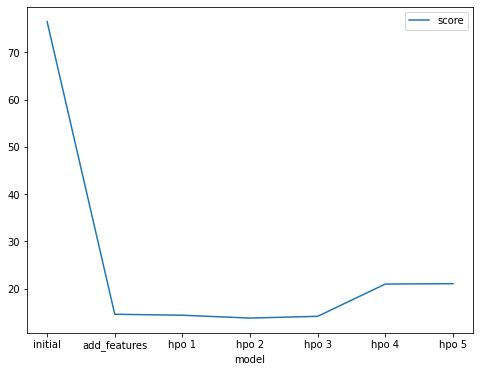

In [54]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo 1", "hpo 2", "hpo 3", "hpo 4", "hpo 5"],
        "score": [76.53, 14.57, 14.36, 13.76, 14.13, 20.96, 21.04]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

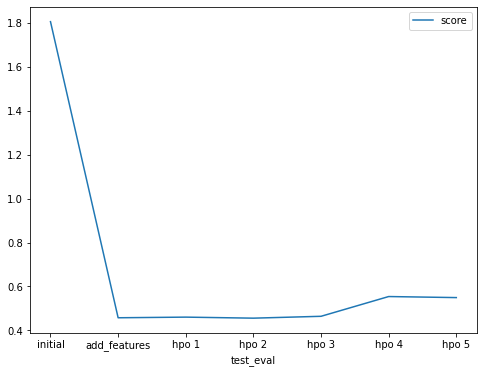

In [55]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo 1", "hpo 2", "hpo 3", "hpo 4", "hpo 5"],
        "score": [1.80551, 0.45745, 0.46036, 0.45565, 0.46413, 0.55408, 0.54929]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
df_results = pd.DataFrame({
    "model": ["initial", "add_features", "hpo 1", "hpo 2", "hpo 3", "hpo 4", "hpo 5"],
    "hpo": ['-', 'auto_stack=True', 'time_limit = 1200', 'num_bag changing', 'custom hyperparam_1', 'custom hyperparam_2', 'tune the hyperparameter'],
    "score": [1.80551, 0.45745, 0.46036, 0.45565, 0.46413, 0.55408, 0.54929]
})

In [59]:
df_results

,model,hpo,score
0,initial,-,1.80551
1,add_features,auto_stack=True,0.45745
2,hpo 1,time_limit = 1200,0.46036
3,hpo 2,num_bag changing,0.45565
4,hpo 3,custom hyperparam_1,0.46413
5,hpo 4,custom hyperparam_2,0.55408
6,hpo 5,tune the hyperparameter,0.54929


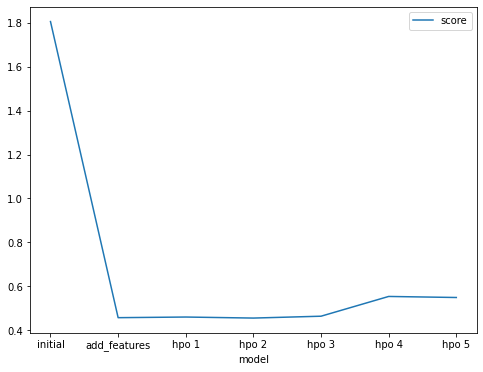

In [60]:
fig = df_results.plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

|model|hpo|score|
|0|initial|1.80551
|1|add_features|auto_stack=True	0.45745
|2|hpo 1|time_limit = 1200	0.46036
|3|hpo 2|num_bag changing	0.45565
|4|hpo 3|custom hyperparam_1	0.46413
|5|hpo 4|custom hyperparam_2	0.55408
|6|hpo 5|tune the hyperparameter	0.54929